In [1]:
from Binaries import *

-7/2401 /cr/tempdata01/filip/iRODS/corrected/peru_randoms0794.csv: 5000 traces
-12.0 -12.0
-11.0 -11.0
-13.0 -13.0


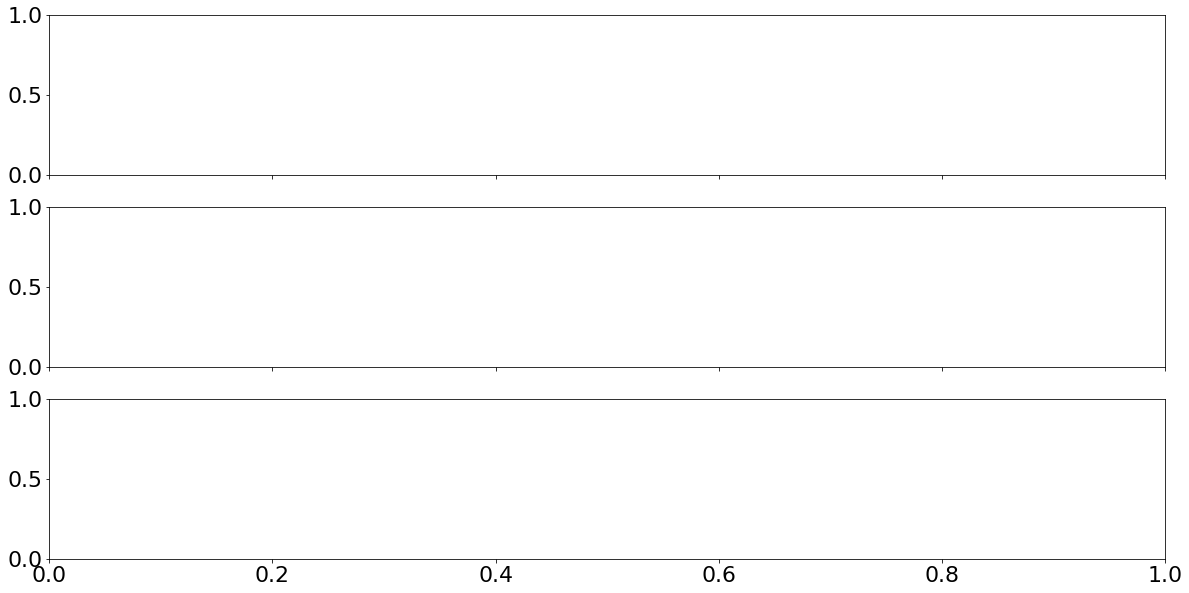

In [31]:
for index in [-7]:

    Buffer = RandomTrace(index)
    
    vem_peak = []

    print(f"{index}/{RandomTrace.all_n_files} {RandomTrace.baseline_dir + RandomTrace.all_files[index]}: {len(Buffer._these_traces)} traces" )

    station = np.array(Buffer._these_traces)
    pmt1, pmt2, pmt3 = station[:,0], station[:,1], station[:,2]
    pmt1 = [item for sublist in pmt1 for item in sublist]
    pmt2 = [item for sublist in pmt2 for item in sublist]
    pmt3 = [item for sublist in pmt3 for item in sublist]

fig, axes = plt.subplots(3, 1, sharex = True)

for i, pmt in enumerate([pmt1, pmt2, pmt3]):

    n, bins = np.histogram(pmt, bins = 250, range = (min(pmt), max(pmt)) )
    bin_centers, max_trigger = 0.5 * (bins[1:] + bins[:-1]), sum(n)/(sum(n) * 8.33e-9)
    trigger_rates = [0, *np.cumsum(n)/(sum(n) * 8.33e-9)]

    print(bins[np.argmin(np.abs(np.array(trigger_rates) - 70))], bins[0])